# Billionaires Statistics Dataset
- 주어진 데이터를 기반으로 EDA 를 한다.
- EDA 한 데이터로 자수성가한 억만장자를 찾아낸다.
- selfMade 컬럼을 예측한다.


In [1]:
# 모듈 다운로드가 필요할 수 있습니다.
# 필요시 주석 제거 후 실행시키세요.

# !pip install missingno
# !pip install geopandas
# !pip install folium

     ---------------------------------------- 51.1/51.1 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 22.9/22.9 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 6.1/6.1 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 1.4/1.4 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 100.3/100.3 kB 6.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
ROOT_DATASET_PATH = "../data/billionaires-statistics-dataset"
DATASET_NAME = "Billionaires Statistics Dataset.csv"

## 기본 데이터 확인
- 데이터셋의 기본 정보를 확인합니다.
- 전체적인 정보를 시각화 하여 확인합니다.

In [2]:
# df = pd.read_csv(f"{ROOT_DATASET_PATH}/{DATASET_NAME}")
df = pd.read_csv('./data/Billionaires Statistics Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

## Finding Missing Values 결측치 확인
- Organization 과 residenceStateRegion, title, state 가 가장 많은 결측치를 갖고 있다. (1000 후반 ~ 2000 초반)
#
- age - 65
- country - 38
- city - 72
- birthDate - 76
- firstName - 3
- birthYear - 76
- birthMonth - 76
- birthDay - 76
- cpi_country - 184
- cpi_change_country - 184
- gdp_country - 164
- gross_tertiary_education_enrollment - 182
- gross_primary_education_enrollment_country - 181
- life_expectancy_country - 182
- tax_revenue_country_country - 183
- total_tax_rate_country - 182
- population_country - 164
- latitude_country - 164
- longitude_country - 164


In [5]:
# 결측치 확인
print(df.isnull().sum())

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

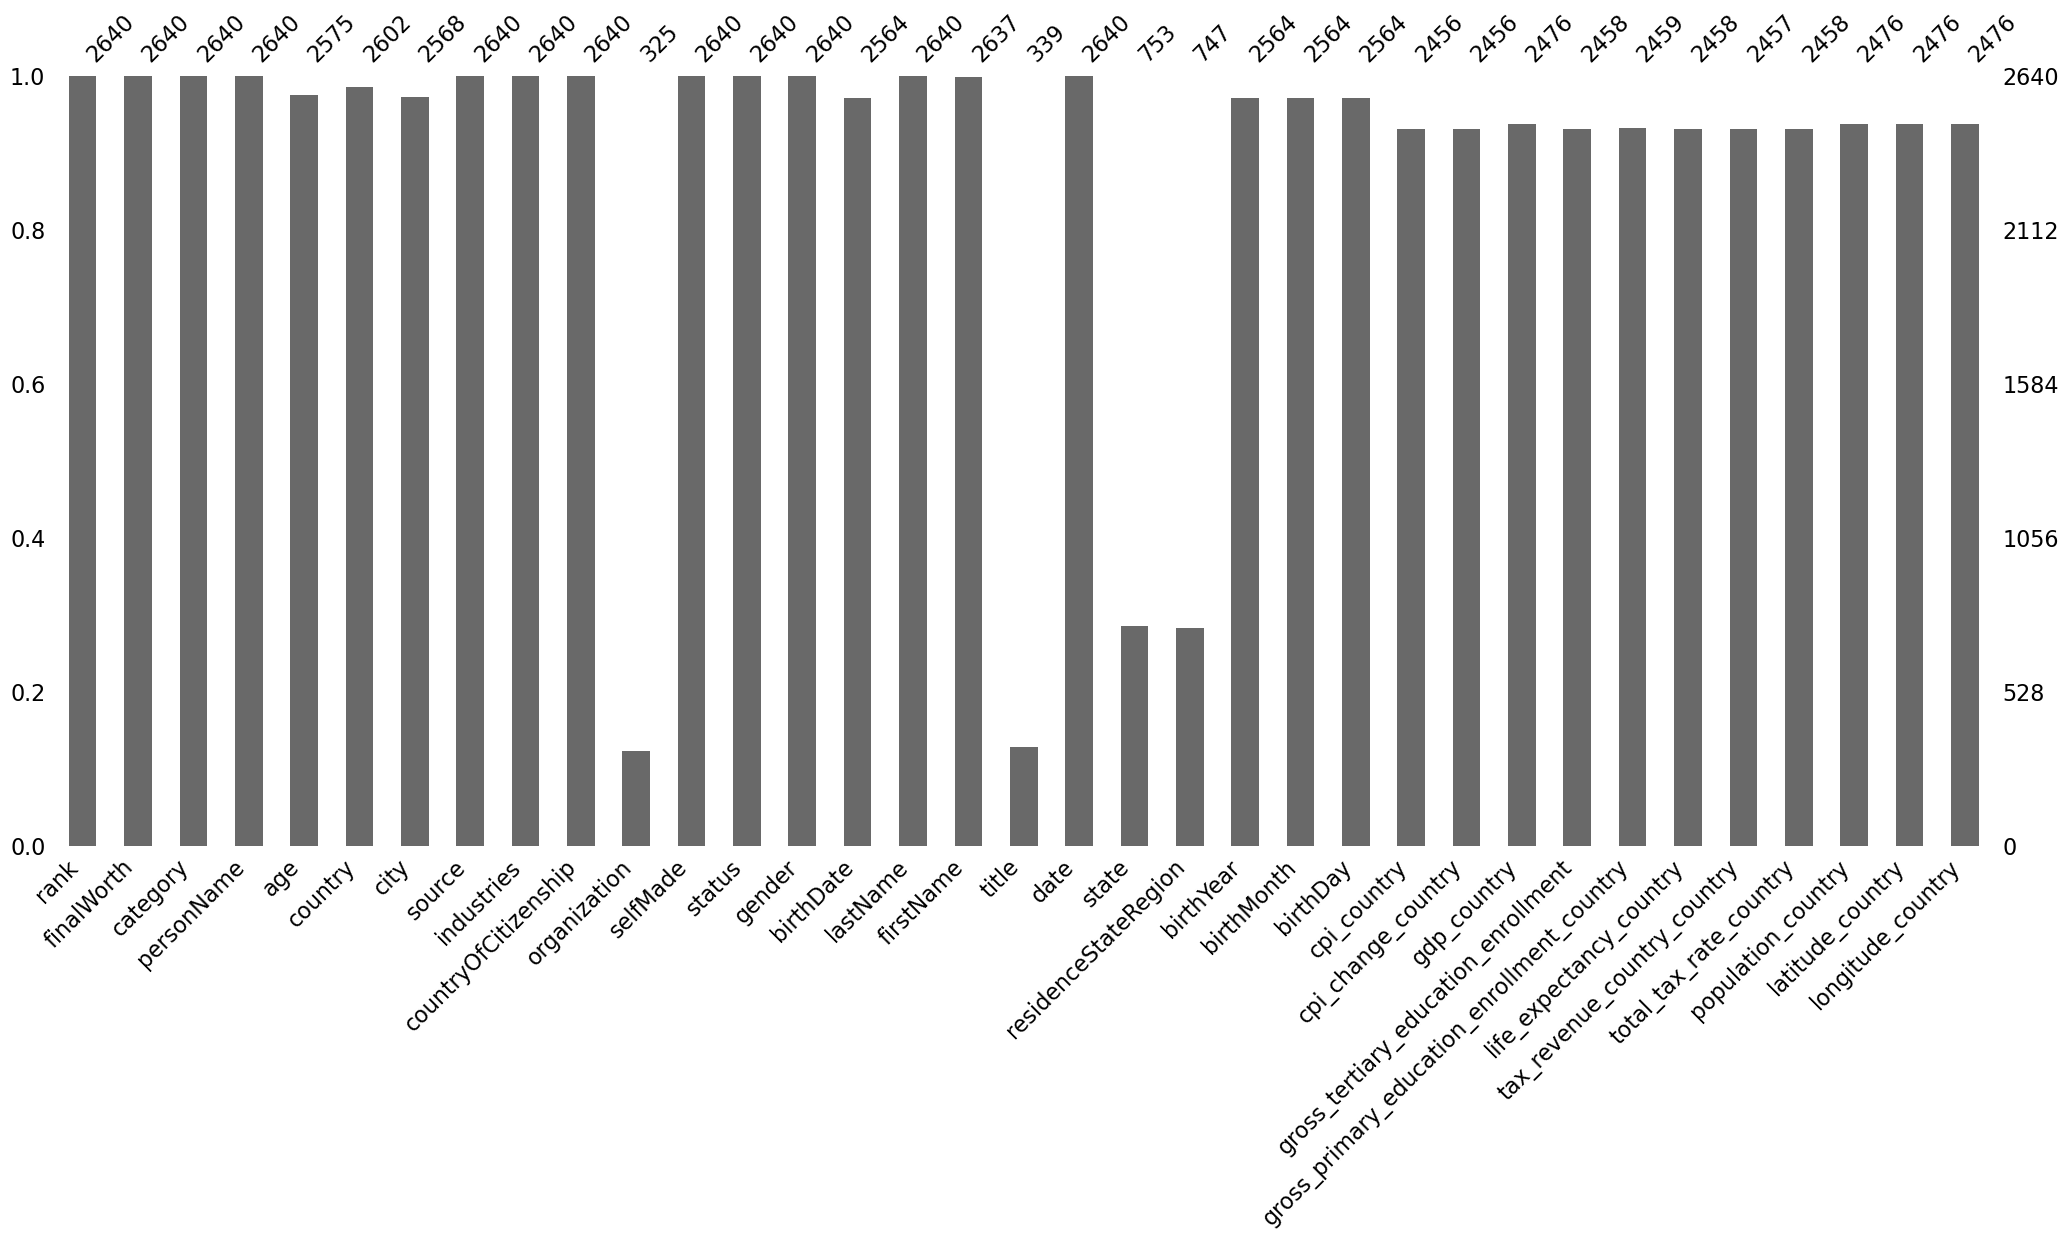

In [6]:
# 결측치를 그래프로 확인합니다.
# msno.matrix(df) # choose one 
msno.bar(df)
plt.show()

## Visualize data distribution by columns 컬럼별 데이터 분포 확인
- ``selfMade``:
    - True: Founder
    - False: Inherited 

In [8]:
# Grouping data based on selfMade
df.groupby('selfMade').mean()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
selfMade,,,,,,,,,,,,,,,,
False,1219.502415,4970.410628,66.149936,1956.177070,5.732484,12.552866,128.361590,4.190431,66.828802,104.462903,78.421938,13.819946,41.907672,3.247721e+08,33.092240,-1.371654
True,1320.988962,4465.397351,64.695749,1957.627319,5.743676,11.899944,127.492695,4.439382,67.397609,102.162507,77.993236,11.995160,44.853936,5.915546e+08,35.698229,18.705109


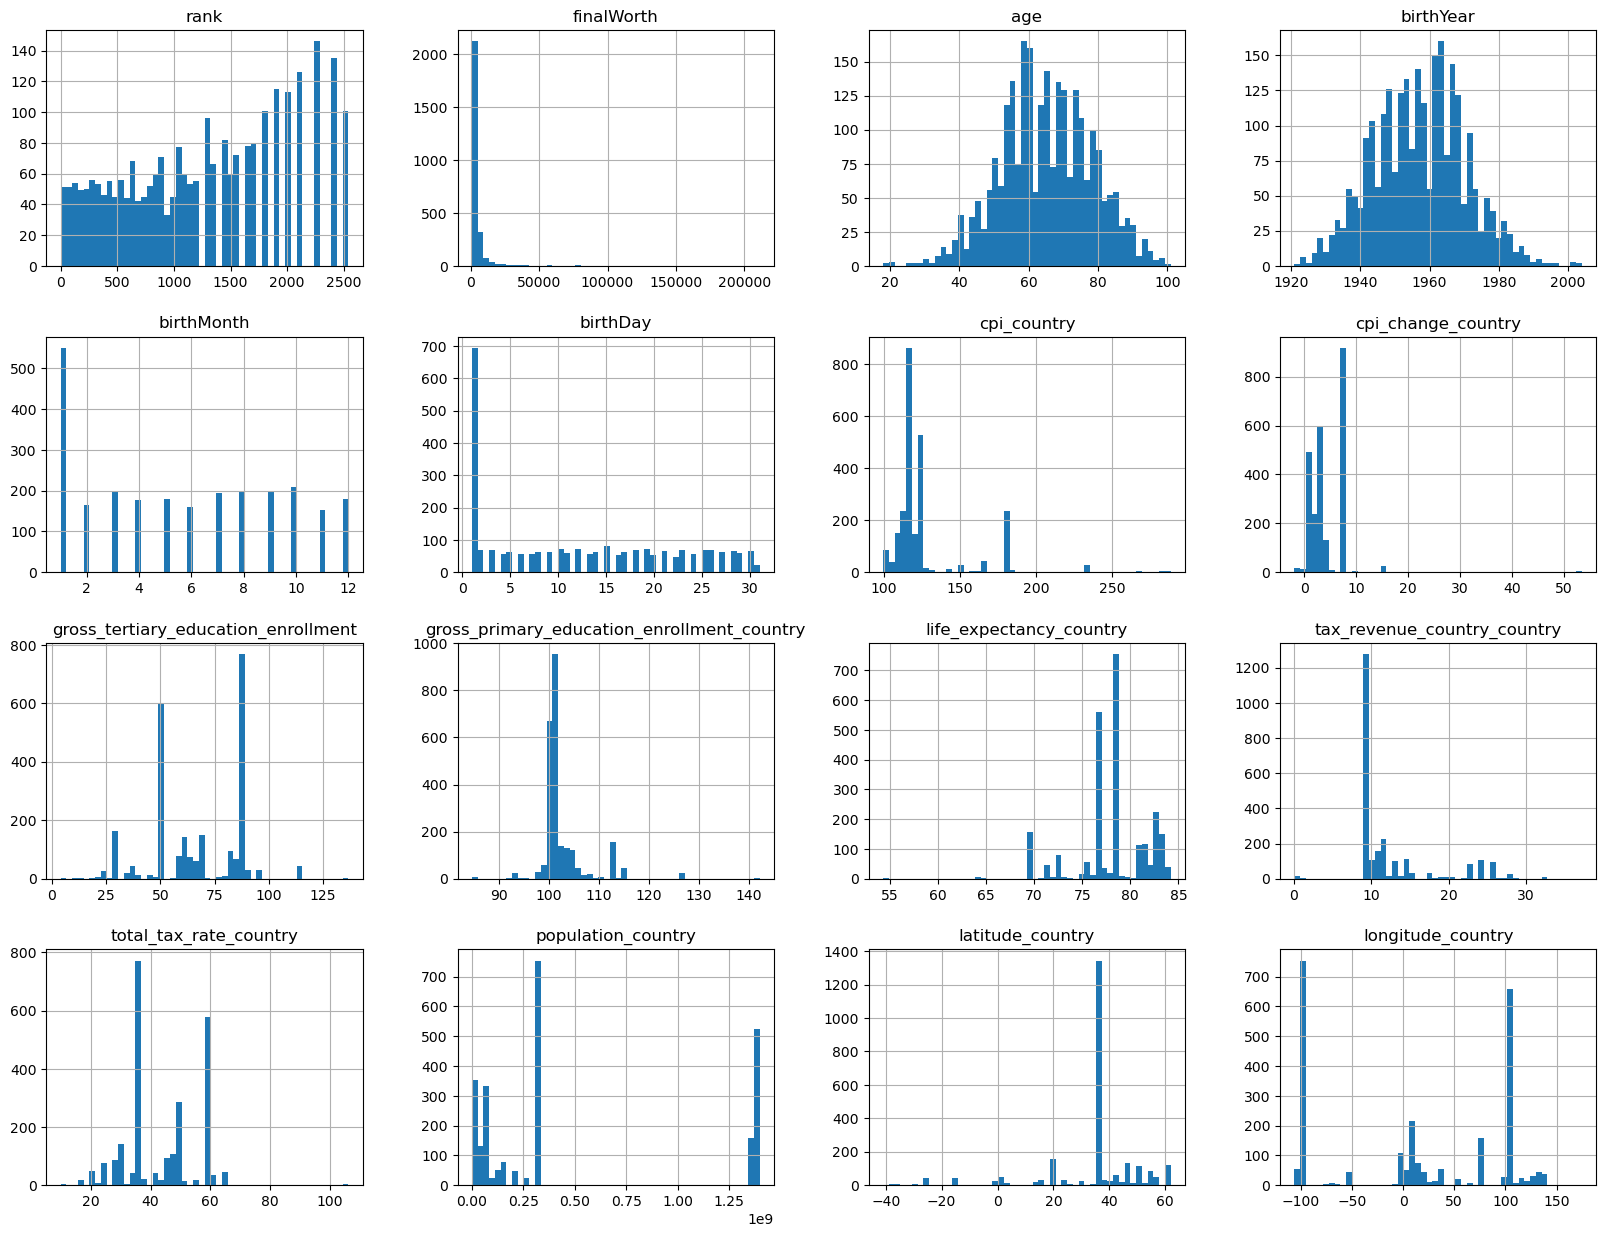

In [7]:
# 전체 데이터 분포
df.hist(bins=50, figsize=(20,15))
plt.show()

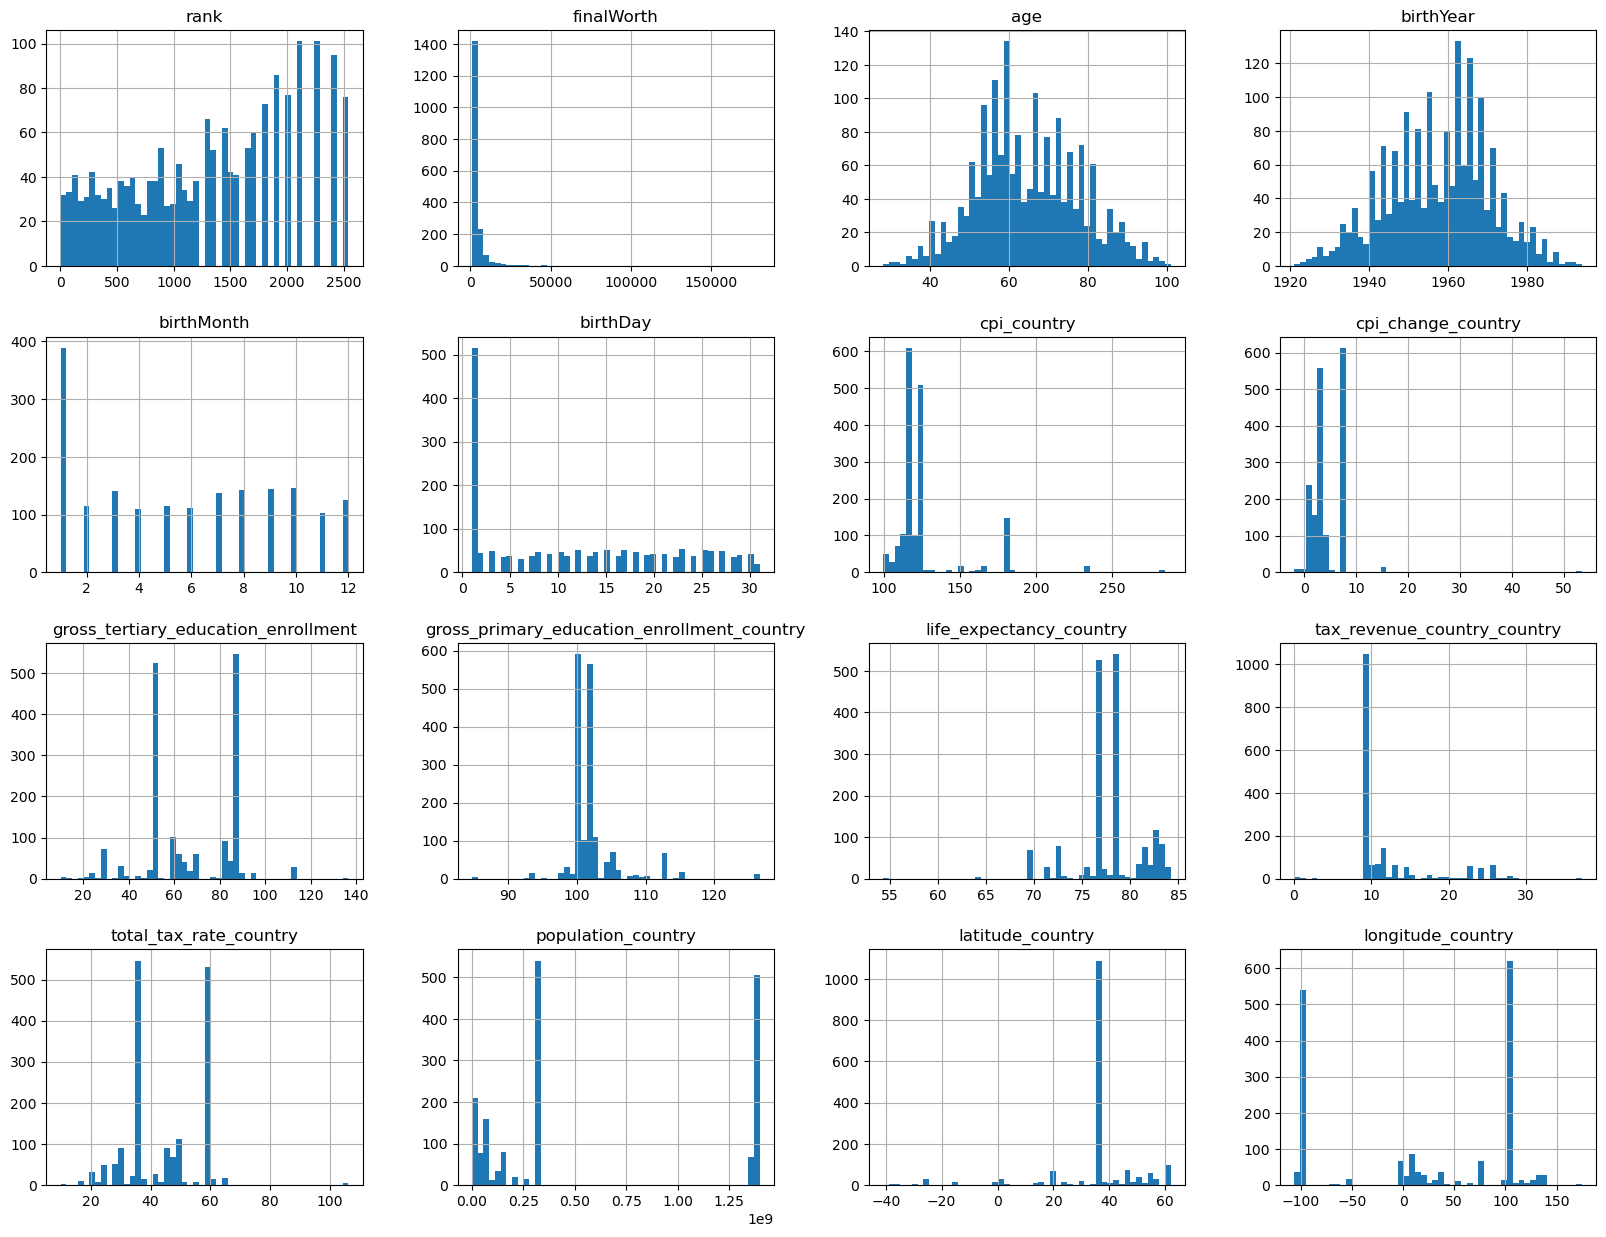

In [8]:
# 자수성가인 사람들의 데이터 분포
df.loc[df.selfMade].hist(bins=50, figsize=(20,15))
plt.show()

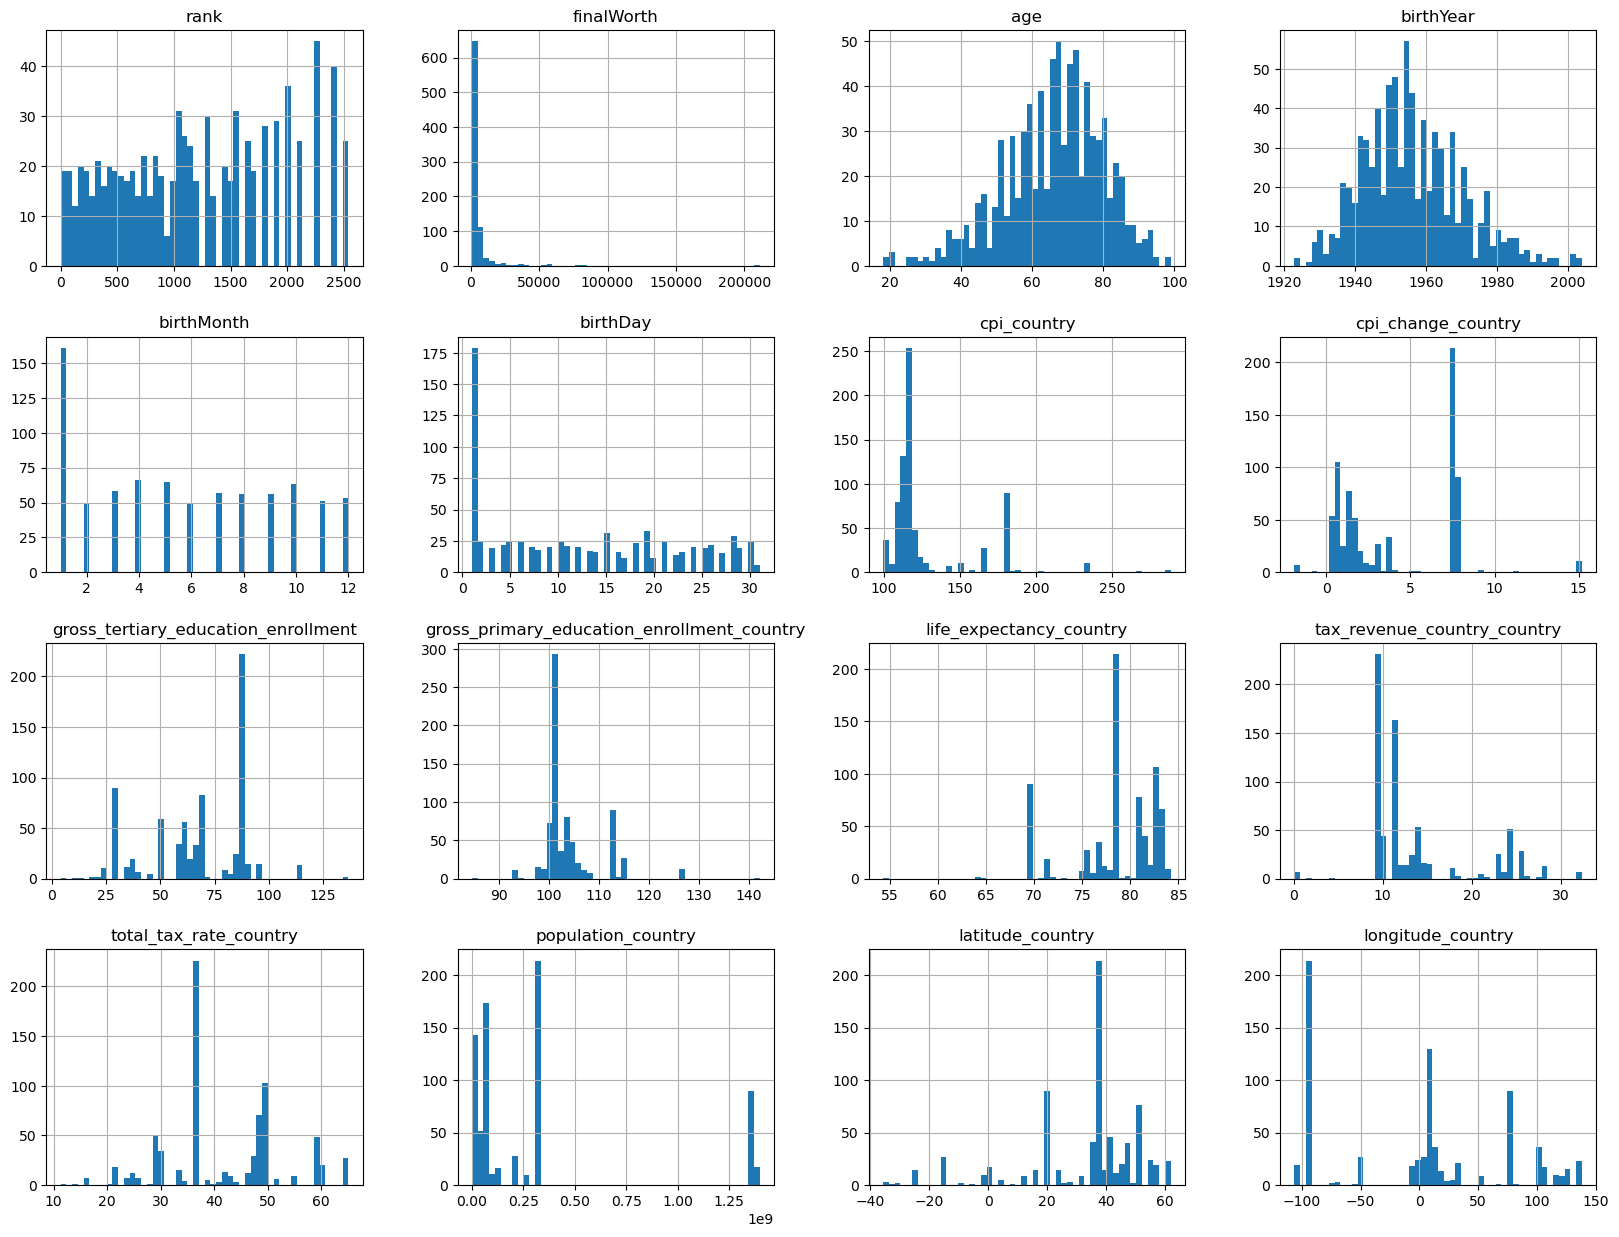

In [9]:
# 자수성가 아닌 컬럼별 데이터 분포 확인
df.loc[~df.selfMade].hist(bins=50, figsize=(20,15))
plt.show()

## 직업 카테고리 별 비율 확인
- 자수성가한 사람들: Technology > Finance & Investments > Manufacturing > Fashion & Retail > Healthcare > RealEstate > 나머지...
- 자주성가하지 않은 사람들: Fashion & Retail > Diversified > Food & Beverage > Finance & Investment > Manufacturing > RealEstate > 나머지...
- 자수성가한 사람들과 아닌 사람들에서 차이가 있음을 확인했다.

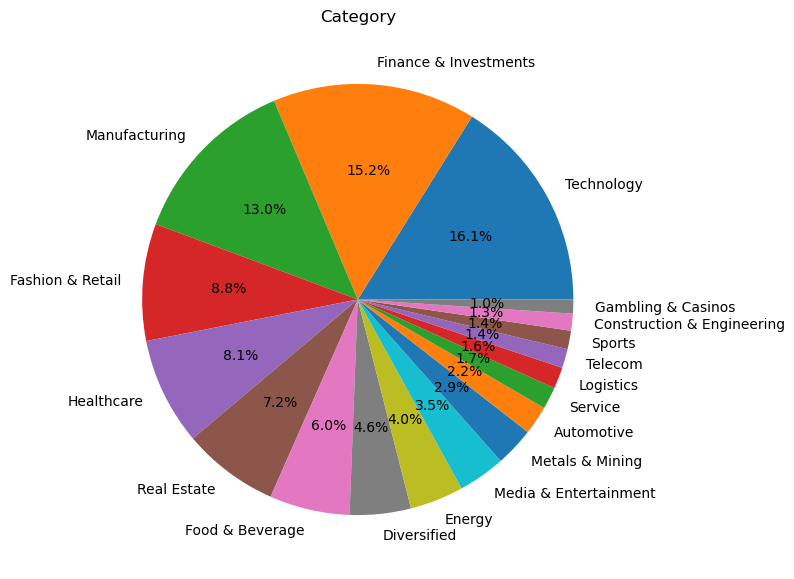

In [10]:
# 직업 카테고리 percentage 확인
# 자수성가한 사람들
category = df.loc[df.selfMade]['category'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(category,labels=category.index, autopct='%1.1f%%')
plt.title('Category')
plt.show()

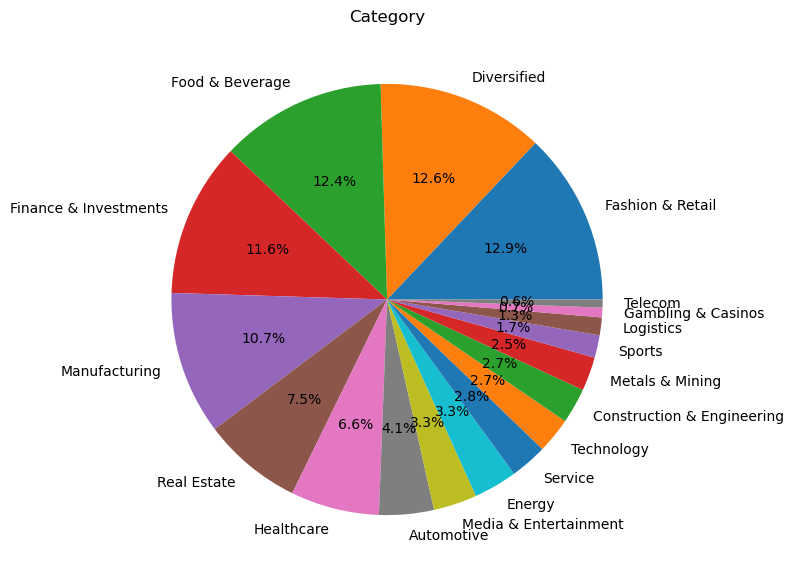

In [11]:
# 직업 카테고리 percentage 확인
# 자수성가한 사람들
category = df.loc[~df.selfMade]['category'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(category,labels=category.index, autopct='%1.1f%%')
plt.title('Category')
plt.show()

## 억만장자 거주나라 value_count 확인
- 자수성가: US > China > 나머지...
- 상속자: US > India > Germany > 나머지...
- 차이가 좀 있다.

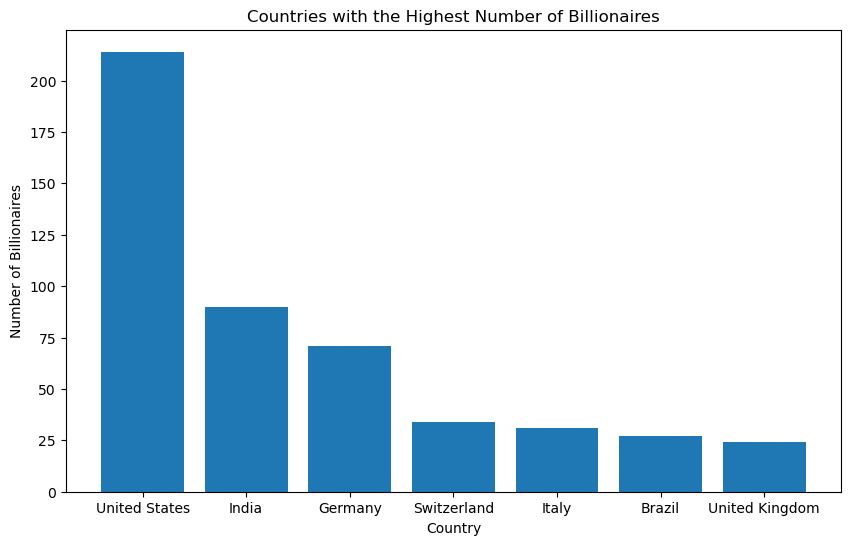

In [12]:
# 상속자 거주나라 value_count 확인
countries = df.loc[~df.selfMade]['country'].value_counts().head(7)
plt.figure(figsize=(10, 6))
plt.bar(countries.index, countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Countries with the Highest Number of Billionaires')
plt.show()

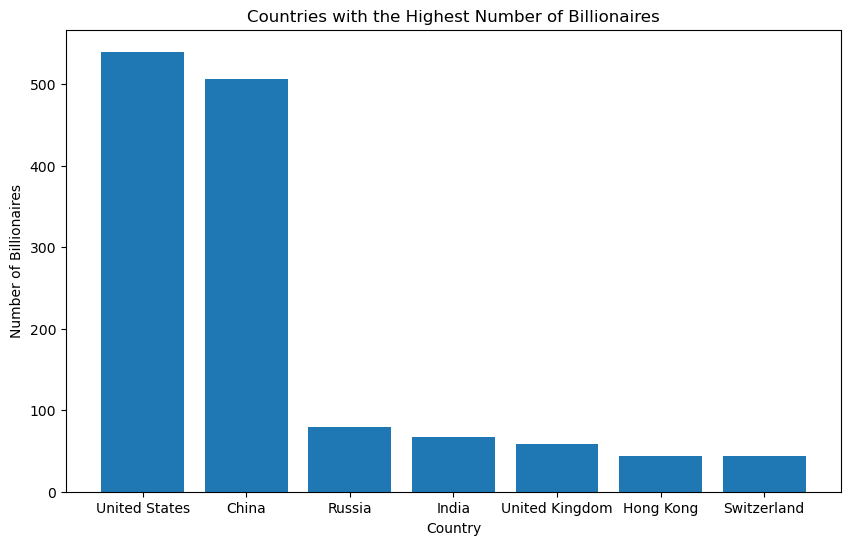

In [13]:
# 자수성가 거주나라 value_count 확인
countries = df.loc[df.selfMade]['country'].value_counts().head(7)
plt.figure(figsize=(10, 6))
plt.bar(countries.index, countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Countries with the Highest Number of Billionaires')
plt.show()

In [14]:
"""
# 지도통해서 데이터 시각화 돌리지 않아도 괜찮습니다.
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

spatial_data = df[['latitude_country','longitude_country','country']]
spatial_data=spatial_data.dropna()

data = spatial_data.copy()
data = data.rename(columns={'latitude_country': 'Latitude',
                        'longitude_country': 'Longitude',
                        'country':'Country'})

# Group by country and count the number of billionaires
billionaires_count = data.groupby('Country').size().reset_index(name='Billionaires')

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with billionaires count data
world = world.merge(billionaires_count, how='left', left_on='name', right_on='Country')

# Fill missing values with 0 (for countries without billionaires)
world['Billionaires'] = world['Billionaires'].fillna(0)

# Create choropleth map
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=billionaires_count,
    columns=['Country', 'Billionaires'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Billionaires',
).add_to(m)

# Add markers for individual billionaires (optional)
marker_cluster = MarkerCluster().add_to(m)
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f'Country: {row["Country"]}',
        icon=None  # You can customize the marker icon here
    ).add_to(marker_cluster)

# Display the map
m.save('billionaires_map.html')
m
"""

'\n# 지도통해서 데이터 시각화 돌리지 않아도 괜찮습니다.\nimport geopandas as gpd\nimport folium\nfrom folium.plugins import MarkerCluster\n\nspatial_data = df[[\'latitude_country\',\'longitude_country\',\'country\']]\nspatial_data=spatial_data.dropna()\n\ndata = spatial_data.copy()\ndata = data.rename(columns={\'latitude_country\': \'Latitude\',\n                        \'longitude_country\': \'Longitude\',\n                        \'country\':\'Country\'})\n\n# Group by country and count the number of billionaires\nbillionaires_count = data.groupby(\'Country\').size().reset_index(name=\'Billionaires\')\n\n# Load world map shapefile\nworld = gpd.read_file(gpd.datasets.get_path(\'naturalearth_lowres\'))\n\n# Merge world map with billionaires count data\nworld = world.merge(billionaires_count, how=\'left\', left_on=\'name\', right_on=\'Country\')\n\n# Fill missing values with 0 (for countries without billionaires)\nworld[\'Billionaires\'] = world[\'Billionaires\'].fillna(0)\n\n# Create choropleth map\nm = fol

## Duplicated columns 중복 컬럼인지 확인하기
- category 와 industries 의 내용이 비슷하여 같은 데이터를 갖고 있는지 확인함 => 같은 데이터를 갖고 있다.
- country 와 countryOfCitizenship 의 내용이 비슷하여 같은 데이터를 갖고 있는지 확인함 => 다른 데이터를 갖고 있다.
- 자수성가한 사람과 상속자 중 본인 국가가 아닌 다른 나라에 거주하고 있는 사람들은 어떨까?
  - 자수성가: selfMade: 204
  - 상속자: 112
  - 자수성가가 두배정도 많다.

In [15]:
print(df['category'].equals(df['industries'])) # 같은 데이터를 가지고 있는지 확인
print(df['country'].equals(df['countryOfCitizenship']))

True
False


In [16]:
choice = df['country'] == df['countryOfCitizenship']
choice.value_counts(False)

True     2324
False     316
Name: count, dtype: int64

In [17]:
# 시민권과 거주 국가가 다른 사람들의 확인
people_living_abraod = df.loc[df.country != df.countryOfCitizenship]
print(f"자수성가: {people_living_abraod.selfMade.value_counts()}")

자수성가: selfMade
True     204
False    112
Name: count, dtype: int64


## Rank
- 공동순위가 많음
- 자수성가의 rank 밀도 측정 -> 높은 순위에서 자수성가가 더 많은가?
  - 자수성가 True 값 자체가 많기 때문에 그렇게 보인다.
  - 의미없다...

In [18]:
# 공동순위가 많음
len(df['rank'].unique())

219

<Figure size 2000x500 with 0 Axes>

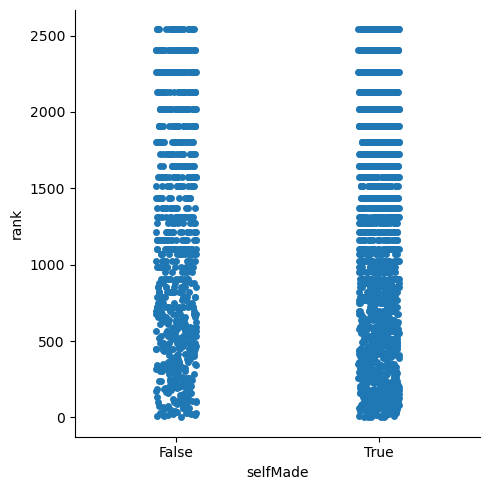

In [19]:
# 자수성가 True 의 데이터 양이 훨신 많아서 밀도가 높아보임...
plt.figure(figsize=(20,5))
sns.catplot(data=df, x="selfMade", y="rank", kind="strip")
plt.show()

In [20]:
# 자수성가 value_count
df['selfMade'].value_counts()

selfMade
True     1812
False     828
Name: count, dtype: int64

In [21]:
# 컬럼별 확인해야함.
# df.selfMade = df.selfMade.map(int)
# pd.get_dummies(df.select_dtypes(exclude="number").iloc[]).corr()

In [22]:
# 숫자 컬럼들에선 gross_primary_education_enrollment_country, population_country 만 -0.2 로 그나마 낫다.
df.selfMade = df.selfMade.map(int)
df.select_dtypes(include="number").corr()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,1.000000,-0.448930,-0.142686,0.063669,0.143708,-0.042514,-0.042987,0.074872,-0.069537,-0.126277,0.005887,-0.041443,0.021576,0.123434,0.118411,-0.060056,0.185638
finalWorth,-0.448930,1.000000,0.067053,-0.023831,-0.066721,0.003407,0.059315,-0.042842,0.035702,0.066711,-0.008880,0.021819,-0.009270,-0.036381,-0.053024,0.031122,-0.101048
age,-0.142686,0.067053,1.000000,-0.050538,-0.999336,0.015322,0.081547,-0.001479,0.115669,0.061736,0.066394,0.020327,0.006429,-0.151771,-0.167812,-0.122544,-0.169338
selfMade,0.063669,-0.023831,-0.050538,1.000000,0.050333,0.001391,-0.030345,-0.015086,0.031552,0.012241,-0.224357,-0.052792,-0.156087,0.111429,0.221644,0.070572,0.106552
birthYear,0.143708,-0.066721,-0.999336,0.050333,1.000000,-0.045066,-0.091512,-0.000738,-0.118060,-0.061316,-0.066810,-0.017936,-0.005262,0.151297,0.167355,0.125035,0.169756
birthMonth,-0.042514,0.003407,0.015322,0.001391,-0.045066,1.000000,0.221384,0.056870,0.106427,0.049269,0.026174,-0.044165,0.001484,-0.046784,-0.050506,-0.038060,-0.062697
birthDay,-0.042987,0.059315,0.081547,-0.030345,-0.091512,0.221384,1.000000,0.037517,0.146357,0.171608,0.045075,0.004498,0.034128,-0.149580,-0.204271,0.006617,-0.188214
cpi_country,0.074872,-0.042842,-0.001479,-0.015086,-0.000738,0.056870,0.037517,1.000000,0.436769,-0.456428,0.279601,-0.747716,-0.037022,0.245961,0.218303,-0.215101,0.258661
cpi_change_country,-0.069537,0.035702,0.115669,0.031552,-0.118060,0.106427,0.146357,0.436769,1.000000,0.167455,0.053483,-0.393884,-0.317516,0.003272,0.066501,-0.113692,-0.470460
gross_tertiary_education_enrollment,-0.126277,0.066711,0.061736,0.012241,-0.061316,0.049269,0.171608,-0.456428,0.167455,1.000000,-0.298473,0.523931,0.028123,-0.393902,-0.543031,0.122088,-0.578740


## Filling Missing Values 결측치 채우기
- country -> 이름이 있는 인물들은 직접 검색
- city-> 각 coutry 및 state를 확인 없다면 coutry에서 가장많은 city로 대체
- age,month -> 추론 가능 데이터 없음 age가 비어있는 인원은 다른 값들도 많이 비워져 있음 및 정규분포 데이터이므로 mean값으로 대체
- cpi -> hongkong: 105.5 , monaco: , 타이완: 106.9

### 삭제
- country 결측값들은 counrty 같은 인원들을 뽑아 mean 값으로 처리 하려했으나 country 없는 데이터는 다른 데이터 결측값도 많아 삭제
- firstname -> 결측값이 적어 직접 인터넷 검색 인도네시아 사업가, 리한나(Fenty), 제이지(Carter)제이지는 가명이라  라스트 네임(shawn)도 바꿀까 생각중  3개뿐이라 엑셀에서 자체수정 (통계치 뽑는데에 의미 없음. 삭제)
- rank - 밀도로 확인했을 때 관계가 없어보임. 삭제해도 괜찮을 것 같다.
- firstname, lastname, city, source -> city는 나라가 있기 때문에 삭제, source는 보류 및 삭제, 이름은 다른 데이터 전처리 예외처리 사용 및 삭제
- oganization -> city & country & industries로 추론해보려 했으나 3가지 컬럼이 같아도 다른 회사인 경우 많아 삭제
- industries -> category와 동일한 데이터 삭제
- title -> 중요한 정보이나 추론 가능성 모르겠음
- birthDate,birthYear,brithDay -> age가 있으므로 삭제 Month는 사용 -> month 왜 사용?
- state -> 미국이 아닌경우 추론 불가 좋은 데이터이나 미국에만 적용되므로 삭제
- residenceStateRegion -> country 또는 state랑 같은 부분이라 삭제
- personName -> fistname과 last네임 이랑 겹치므로 삭제
- date 수집날짜는 같은 날짜 시간만 다르기 때문에 삭제
### 보류
- latitude_country, longitude_country 위도 경도 삭제? -> 추후 결정
- country -> countryOfCitizenship 거주국가와 여권국가

In [3]:
from preprocess import get_X, get_y

X_trn = get_X(df)
y_trn = get_y(df)

Missing Value:
 finalWorth                                    0
category                                      0
age                                           0
country                                       0
industries                                    0
status                                        0
gender                                        0
birthMonth                                    0
cpi_country                                   0
cpi_change_country                            0
gdp_country                                   0
gross_tertiary_education_enrollment           0
gross_primary_education_enrollment_country    0
life_expectancy_country                       0
tax_revenue_country_country                   0
total_tax_rate_country                        0
population_country                            0
latitude_country                              0
longitude_country                             0
dtype: int64
True     1812
False     828
Name: selfMade, dtype: int64


In [10]:
X_trn.shape, y_trn.shape

((2640, 137), (2640,))

## Age, FinalWorth, gdp_country 의 데이터 수치 확인
- box plot 을 사용하여 각 컬럼들의 이상치 유무 확인 및 데이터 값의 범위를 확인합니다.
### 분석 결과
- age 가 0 인 값 존재 - 10대 미만이라는 뜻, 확인 후 결측치라면 수정 필요
- Final Worth 에서 150000 이 넘어가는 이상치 제거 필요

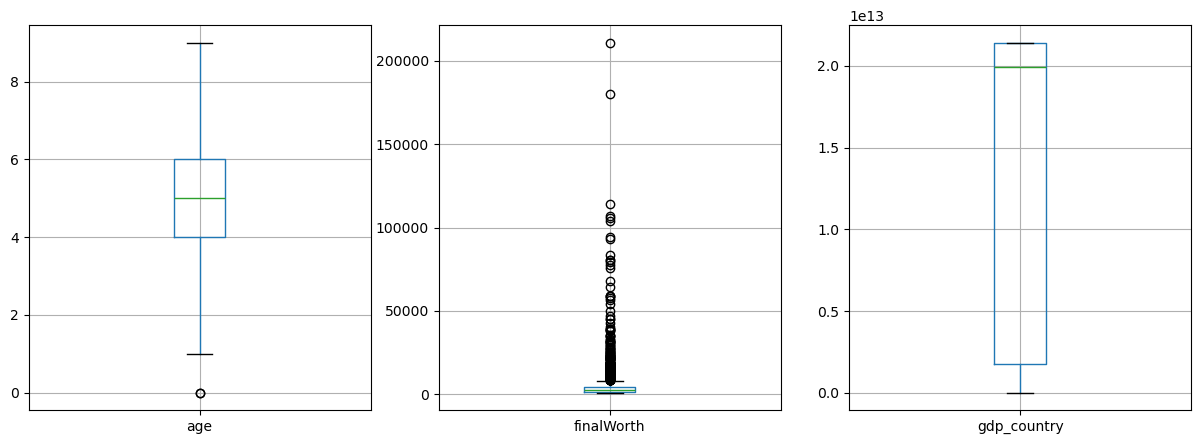

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
X_trn.boxplot(['age']) # colums넣어서 확인

plt.subplot(1, 3, 2)
X_trn.boxplot(['finalWorth']) # colums넣어서 확인

plt.subplot(1, 3, 3)
X_trn.boxplot(['gdp_country']) # colums넣어서 확인

plt.show()

In [13]:
X_trn

,finalWorth,age,birthMonth,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,...,industries_Technology,industries_Telecom,status_D,status_E,status_N,status_R,status_Split Family Fortune,status_U,gender_F,gender_M
0,211000,6,1,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,...,0,0,0,0,0,0,0,1,0,1
1,180000,4,2,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,0,0,1,0,0,0,0,0,0,1
2,114000,4,0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,1,0,1,0,0,0,0,0,0,1
3,107000,6,2,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,1,0,0,0,0,0,0,1,0,1
4,106000,8,2,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,1000,4,0,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,...,0,0,1,0,0,0,0,0,0,1
2636,1000,7,1,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,...,0,0,0,1,0,0,0,0,0,1
2637,1000,5,0,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,...,0,0,0,0,0,1,0,0,0,1
2638,1000,6,2,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,...,0,0,1,0,0,0,0,0,0,1


In [16]:
X_trn.describe()

,finalWorth,age,birthMonth,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,...,industries_Technology,industries_Telecom,status_D,status_E,status_N,status_R,status_Split Family Fortune,status_U,gender_F,gender_M
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000,...,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,4623.787879,5.060985,1.305303,127.457660,4.264939,1.172789e+13,66.673562,102.780038,78.140305,12.545732,...,0.118939,0.011742,0.463258,0.101515,0.056818,0.024621,0.029924,0.323864,0.127652,0.872348
std,9834.240939,1.335836,1.161451,25.771576,3.545838,9.512215e+12,21.018003,4.620368,3.664422,5.364126,...,0.323779,0.107745,0.498743,0.302067,0.231539,0.154997,0.170411,0.468037,0.333765,0.333765
min,1000.000000,0.000000,0.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.000000,4.000000,0.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2300.000000,5.000000,1.000000,117.240000,2.900000,1.991000e+13,64.100000,101.800000,78.500000,9.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4200.000000,6.000000,2.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,211000.000000,9.000000,3.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 고려 사항

샘플링 -> 데이터가 불균형하지만 양이 적음

스케일링 -> 데이터 이상치 column들이 좀 있음

In [4]:
# # 귀무가설로 데이터 설명력(R-squrd)와 P-value값을 확인 하는 코드 칼럼이 많아서 작동 x
# # LinAlgError: Singular matrix -> X 데이터 중 0값으로만 구성된 것과 같은 특이 행렬이 있어서 에러 발생
# import statsmodels.api as sm 
# model=sm.Logit(y_trn.astype(float),X_trn.astype(float))
# result=model.fit()
# print(result.summary2())


## 데이터 분할

trn 데이터를 test와 train으로 나눈 후 

train을 다시 val과 train으로 나누어 파라미터 값 확인

파라미터 확인 후 정밀도 확인 할 경우 val + train 데이터 활용

**당장은 틀과 전처리에 신경써서 활용x**

## Randomforest 1
- 전체 데이터에 대하여 진행
- grid search 진행
- randomforestclassifier 진행

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter("ignore")

In [43]:
pipe=Pipeline([ 
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0))
])
params={
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_trn,y_trn)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 5, 'clf__n_estimators': 90}
0.7689393939393939


In [44]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=2023)
scores = cross_validate(clf, X_trn, y_trn, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.070731,0.020122,0.776515,0.806533,0.886740,0.844737
1,0.053977,0.011559,0.765152,0.788835,0.897790,0.839793
2,0.049859,0.011222,0.759470,0.765237,0.936464,0.842236
3,0.045935,0.010435,0.761364,0.768707,0.933884,0.843284
4,0.048605,0.010998,0.784091,0.768898,0.980716,0.861985
mean,0.053821,0.012867,0.769318,0.779642,0.927119,0.846407
std,0.009888,0.004076,0.010579,0.017678,0.037069,0.008893


## Randomforest 2
- 테스트셋을 분리하여 진행함
- 목적이 무엇인 테스트인지 잘 모르겠다...
- test size 0.3, 0.2, 0.1 에 대한 randomforestclassifier 진행

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_trn,y_trn,test_size=0.2,stratify=y_trn,random_state=2023)

In [52]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=2023)
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.080908,0.013979,0.747045,0.744000,0.962069,0.839098
1,0.073619,0.012252,0.756501,0.760446,0.941379,0.841294
2,0.043572,0.009959,0.765403,0.766017,0.948276,0.847458
3,0.045251,0.010057,0.793839,0.789174,0.955172,0.864275
4,0.046826,0.011116,0.798578,0.795389,0.951724,0.866562
mean,0.058035,0.011473,0.772273,0.771005,0.951724,0.851737
std,0.017778,0.001682,0.022855,0.021156,0.007711,0.012885


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_trn,y_trn,test_size=0.3,stratify=y_trn,random_state=2023)

In [54]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=2023)
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.052598,0.011227,0.743243,0.757282,0.921260,0.831261
1,0.040968,0.012433,0.791892,0.784566,0.960630,0.863717
2,0.040775,0.010095,0.745946,0.763158,0.913386,0.831541
3,0.040240,0.009741,0.807588,0.799342,0.960474,0.872531
4,0.038225,0.010053,0.788618,0.796610,0.928854,0.857664
mean,0.042561,0.010710,0.775457,0.780192,0.936921,0.851343
std,0.005715,0.001116,0.029088,0.019173,0.022255,0.018957


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_trn,y_trn,test_size=0.1,stratify=y_trn,random_state=2023)

In [56]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=2023)
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.055461,0.011772,0.752101,0.754258,0.948012,0.840108
1,0.048259,0.014997,0.785263,0.777228,0.963190,0.860274
2,0.079088,0.010520,0.772632,0.768473,0.957055,0.852459
3,0.045517,0.010895,0.770526,0.769231,0.950920,0.850480
4,0.046178,0.010969,0.812632,0.804627,0.960123,0.875524
mean,0.054901,0.011831,0.778631,0.774763,0.955860,0.855769
std,0.014085,0.001828,0.022392,0.018632,0.006311,0.013179


## 중요도 컬럼 탑 15개 출력
- 모두 0.0 이하의 중요도를 갖는다.
- EDA 가 좀 더 필요한 것 같다.

In [58]:
clf.fit(X_trn,y_trn)
# print(clf.feature_importances_, '\n')
# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(clf.feature_importances_, index=X_trn.columns)

# 내림차순 정렬을 이용한다, 중요도 탑 15개 출력
top15 = ser.sort_values(ascending=False)[:15]
print(top15)

gender_F                                      0.094689
country_China                                 0.088438
gender_M                                      0.077014
gross_primary_education_enrollment_country    0.069980
tax_revenue_country_country                   0.069093
longitude_country                             0.065323
gross_tertiary_education_enrollment           0.060292
country_Germany                               0.045379
population_country                            0.036299
cpi_country                                   0.034237
industries_Technology                         0.032498
latitude_country                              0.030678
category_Technology                           0.029827
total_tax_rate_country                        0.029199
life_expectancy_country                       0.027781
dtype: float64


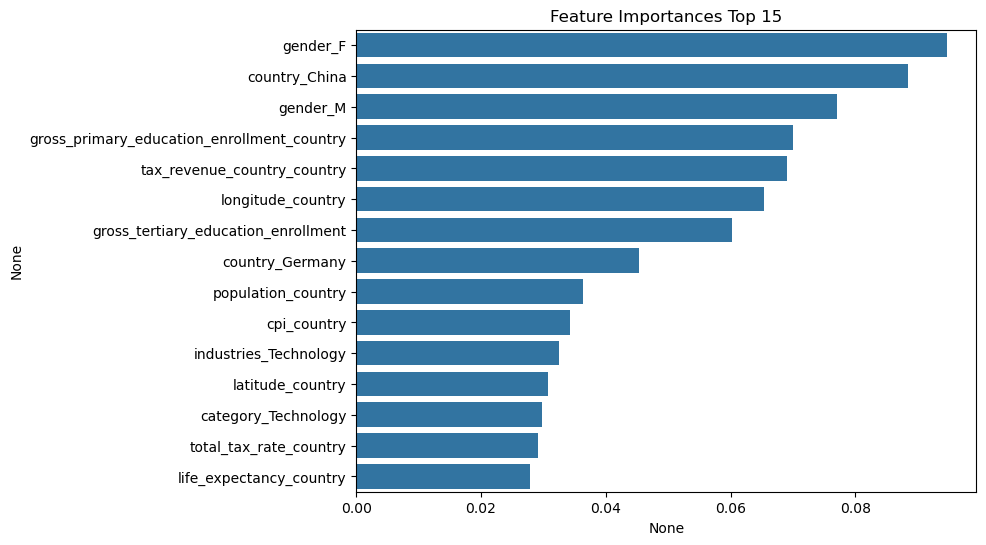

In [59]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
pipe=Pipeline([ 
    ('scaler',StandardScaler()), #스케일링시 74%, 없을때 65%
    ('clf', KNeighborsClassifier())
])
params={
    'clf__n_neighbors': list(range(1,11))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_trn,y_trn)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 7}
0.7450757575757576


## TSNE
- KNN 에서 아이디어를 얻어 하는 추가 시각화
- 이렇게 하는건지 잘 모르겠지만, 일단 합니다.
- 뭔가 확실히 자수성가한 데이터와 아닌 데이터의 차이가 있음을 확인할 수 있었다.


In [94]:
from sklearn.manifold import TSNE
X_trn_selfMade = X_trn.loc[y_trn, :]
X_trn_not_selfMade = X_trn.loc[y_trn == False, :]

y_trn_selfMade = filter(lambda y: y, y_trn)
y_trn_not_selfMade = filter(lambda y: y, y_trn == False)

X_embedded_not_selfMade = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_trn_not_selfMade, y_trn_not_selfMade)
X_embedded_selfMade = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_trn_selfMade, y_trn_selfMade)

In [95]:
data_visualization_selfMade = pd.DataFrame(X_embedded_selfMade)
data_visualization_not_selfMade = pd.DataFrame(X_embedded_not_selfMade)

data_visualization_selfMade["selfMade"] = "is_selfMade"
data_visualization_not_selfMade["selfMade"] = "is_not_selfMade"

In [96]:
data_visualization = pd.concat([data_visualization_selfMade, data_visualization_not_selfMade], axis=0)

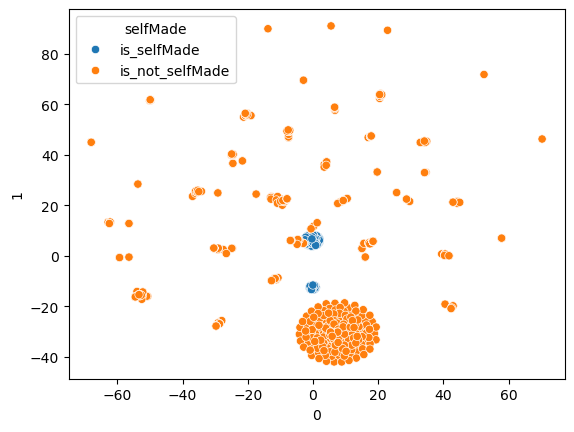

In [97]:
sns.scatterplot(x=data_visualization[0], y=data_visualization[1], hue=data_visualization["selfMade"])
plt.show()

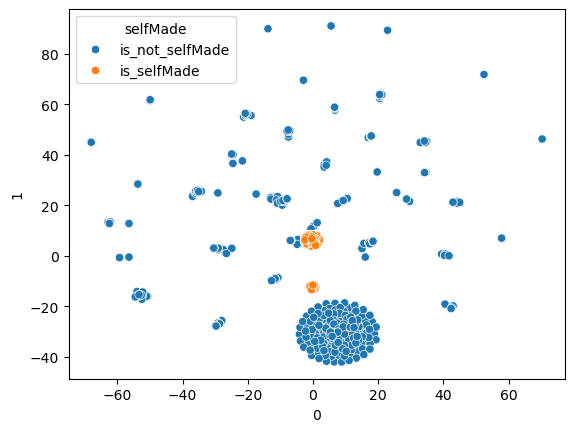

In [98]:
data_visualization = pd.concat([data_visualization_not_selfMade, data_visualization_selfMade], axis=0)
sns.scatterplot(x=data_visualization[0], y=data_visualization[1], hue=data_visualization["selfMade"])
plt.show()

## SVC

In [ ]:
from sklearn.svm import SVC
pipe=Pipeline([ 
    ('scaler',StandardScaler()),#스케일링시 75%, 없을때 68%
    ('clf', SVC(random_state=2023))
])
params={
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1]
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_trn,y_trn)
print(grid.best_params_)
print(grid.best_score_)

## ANN 추가

In [5]:
"""----> 5 result = train_one_epoch(model, loss_fn, optimizer, dl, device)
...
   3808     #  InvalidIndexError. Otherwise we fall through and re-raise
   3809     #  the TypeError.
   3810     self._check_indexing_error(key)

KeyError: 0""" 
# 위 에러를 해결해보기 위함. get_X에서 to_numpy로 불러오지 않고 df로 불러오기 때문에 시도함

X_trn = X_trn.to_numpy(dtype=np.float32)

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.base import BaseEstimator
from tqdm.auto import tqdm

from nn import ANN
from nn_utils import CustomDataset

In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
    )

In [1]:
from nn_train import train_one_epoch

ds = CustomDataset(X_trn, y_trn)
dl = DataLoader(ds, batch_size=1)
model = ANN(X_trn.shape[-1], 256).to(device)

y_trn = y_trn.long() # loss_fn에서 발생한 아래 이슈 해결을 위함
# RuntimeError: expected scalar type Long but found Double 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

result = train_one_epoch(model, loss_fn, optimizer, dl, device)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'CustomDataset' is not defined